# inference_dev
notebook for developing inference pipeline with wtf setup

In [12]:
import numpy as np
import json
import corner
import matplotlib.pyplot as plt

from scripts import pitchfork_compile, pitchfork_sampler, inspect_star

In [13]:
with open('pitchfork/pitchfork.json', 'r') as fp:
    pitchfork_dict = json.load(fp)

with open('pitchfork/pitchfork_info.json', 'r') as fp:
    pitchfork_info = json.load(fp)

pitchfork_cov = np.loadtxt('pitchfork/pitchfork_covariance.txt')

pitchfork = pitchfork_compile(pitchfork_dict, pitchfork_info)

## define likelihood covariance matrix

In [14]:
sampler = pitchfork_sampler(pitchfork, pitchfork_cov)

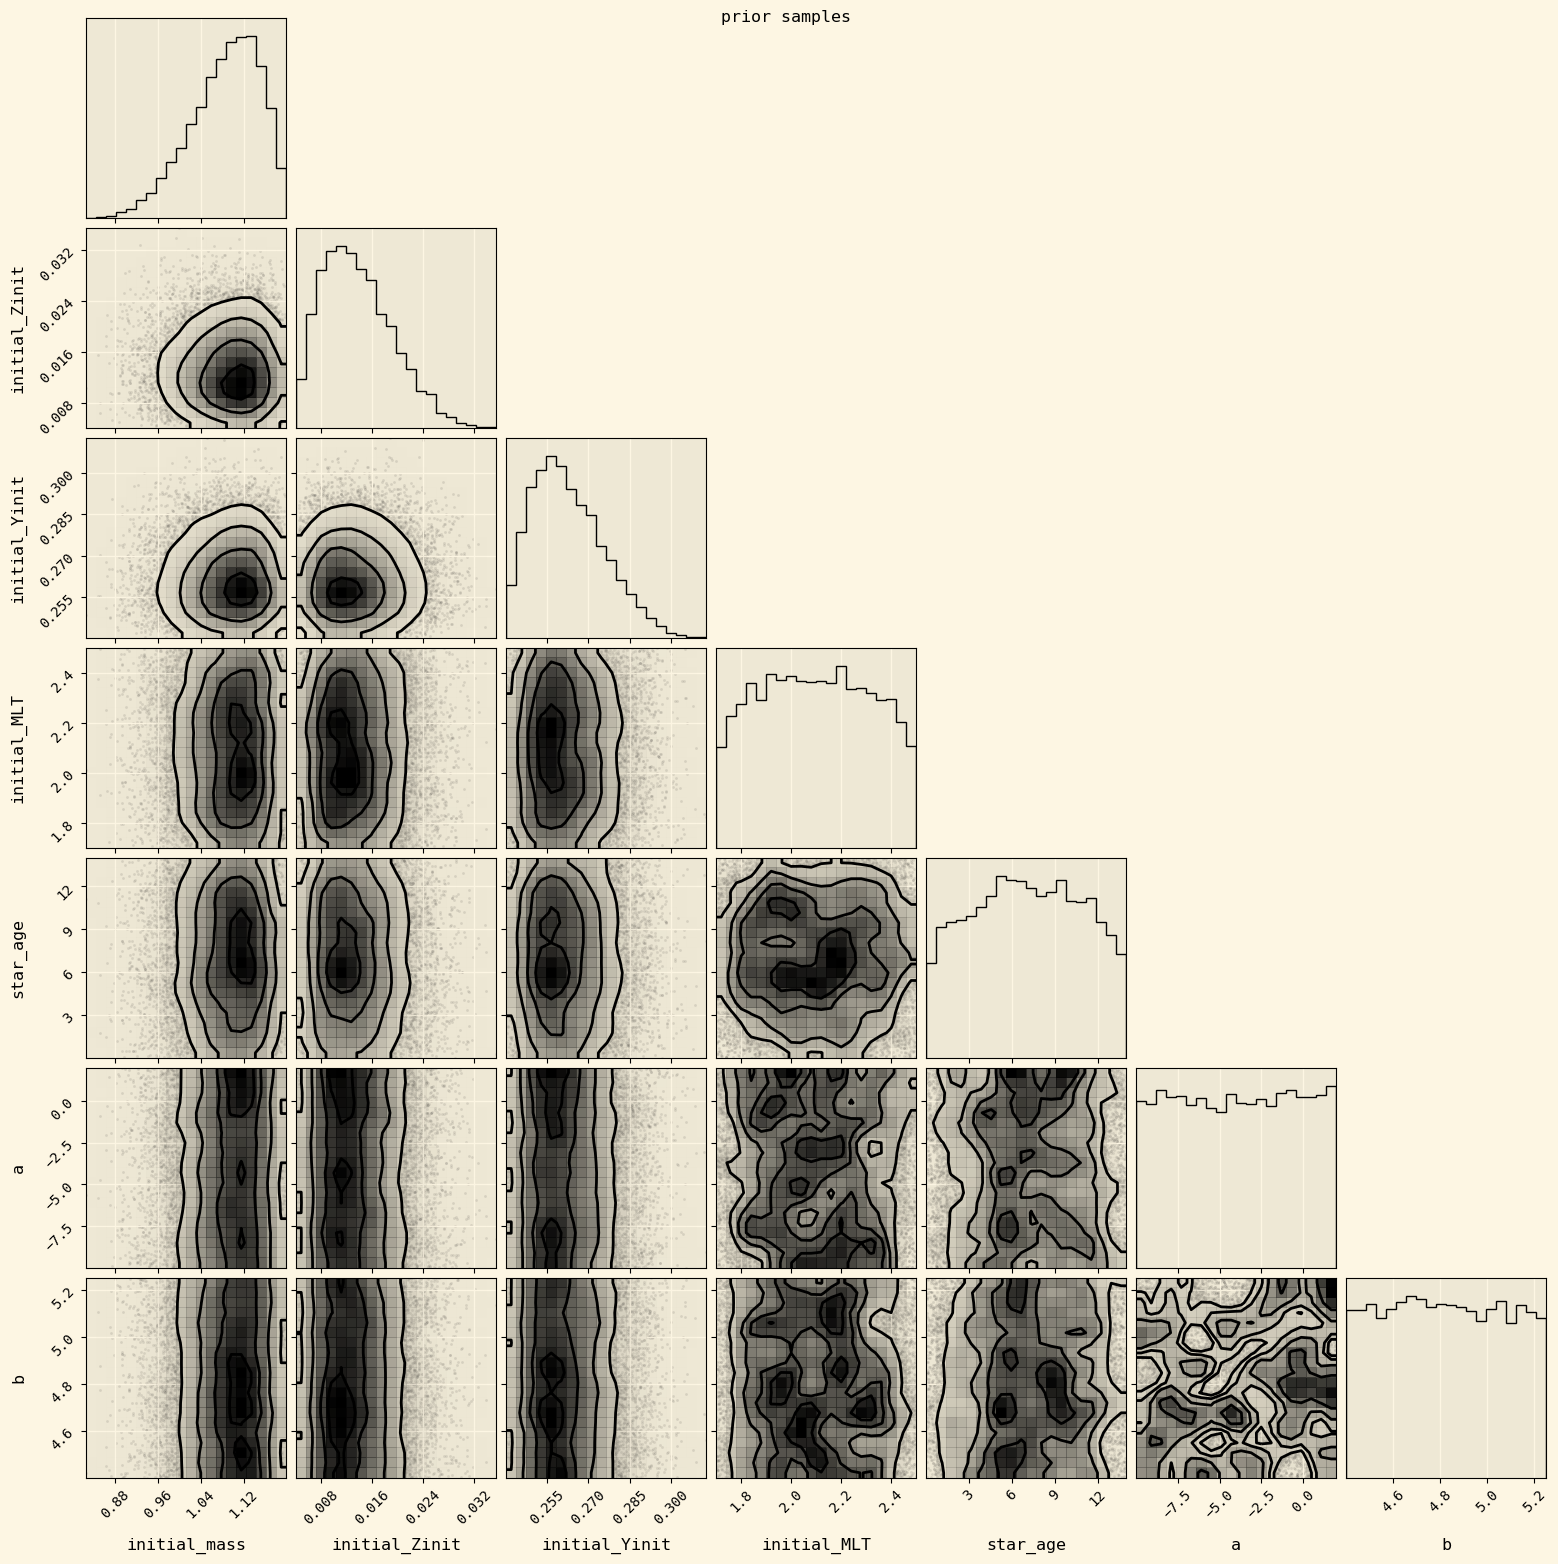

In [15]:
priors = sampler.priors

labels = ['initial_mass', 'initial_Zinit', 'initial_Yinit', 'initial_MLT', 'star_age', 'a', 'b']

size = 10000
prior_samples = np.array([prior.rvs(size=size) for prior in priors])

corner.corner(prior_samples.T, color='black', labels = labels, hist_kwargs={'density':True}, smooth=True);
plt.suptitle('prior samples')
plt.show()

In [16]:
results = sampler('Sun', save=True)

[pitchfork_sampler] sampling posterior of Sun...
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2  83 [-2.2553..-2.2549]*| it/evals=8200/151365 eff=5.4317% N=400               00 
[ultranest] Likelihood function evaluations: 151532
[ultranest]   logZ = -18.08 +- 0.1523
[ultranest] Effective samples strategy satisfied (ESS = 2429.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.05 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.15, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.15 tail:0.01 total:0.15 required:<0.50
[ultranest] done iterating.
[pitchfork_sampler] finished in 1m 9.2s!


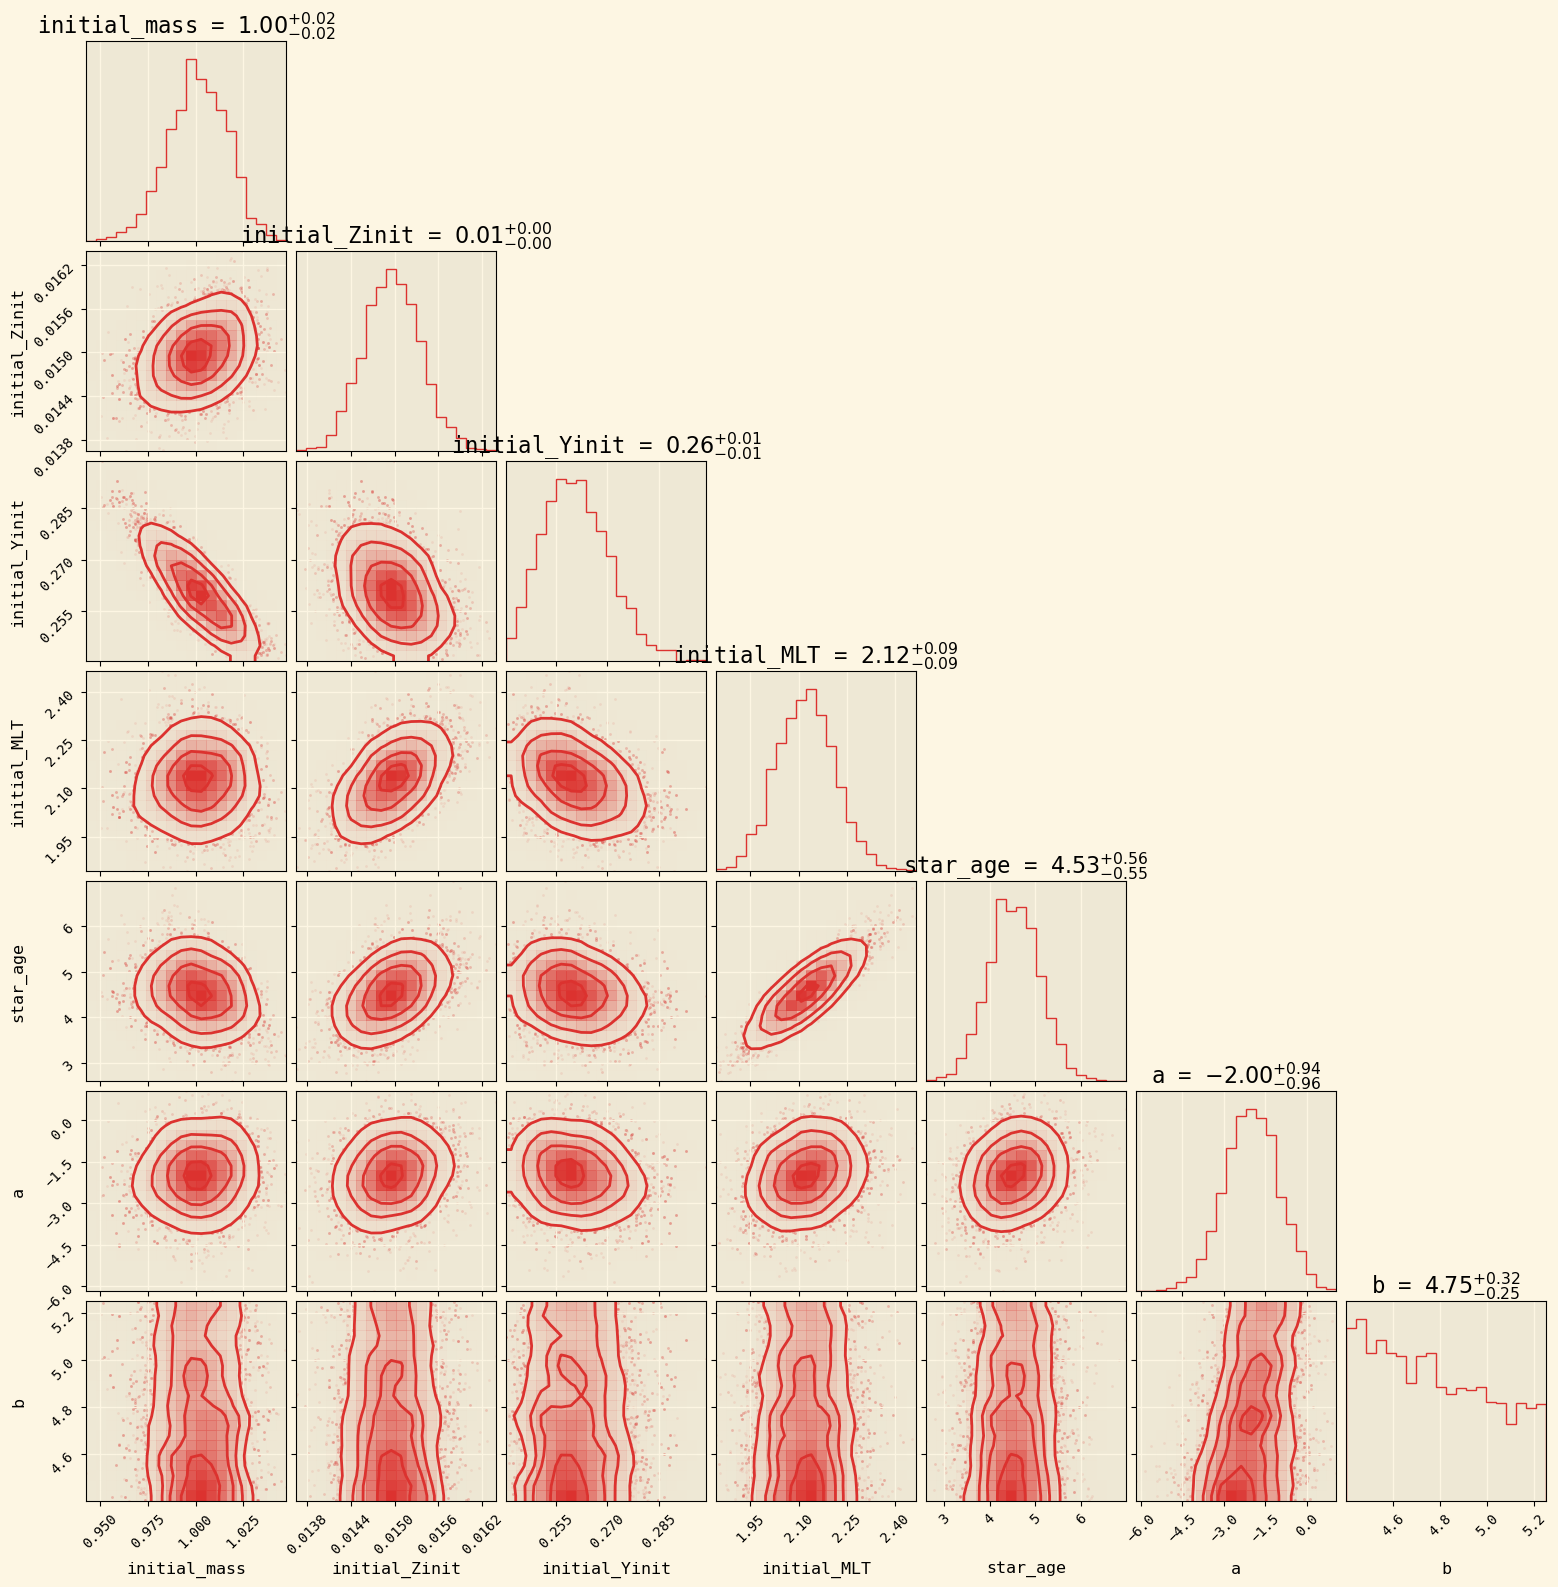

In [6]:
inspect_star('Sun')

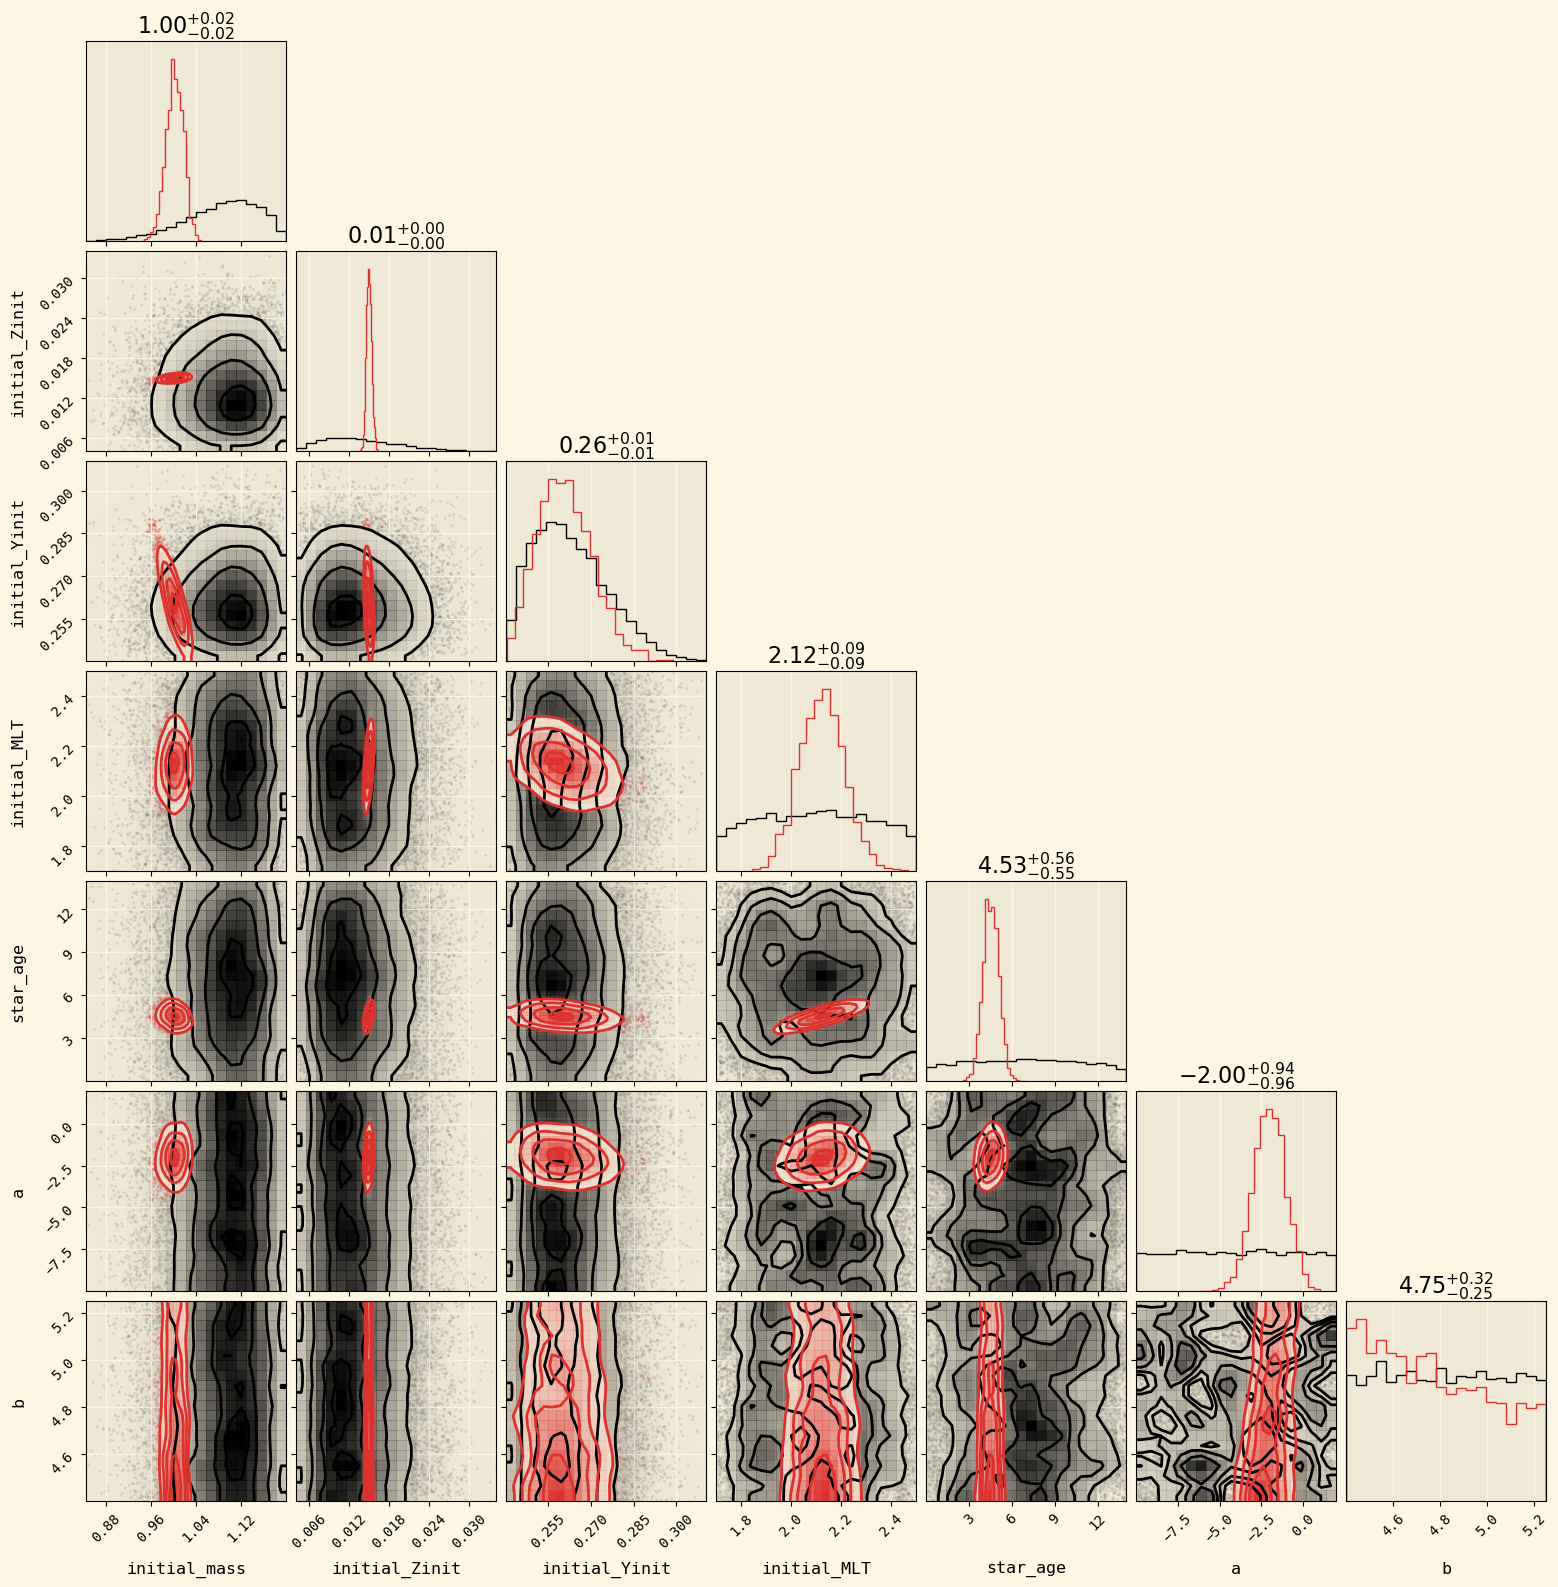

In [7]:
inspect_star('Sun', include_prior=True)

In [5]:
results = sampler('16CygA', save=True)

[pitchfork_sampler] sampling posterior of 16CygA...
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01   [-10.7026..-10.7026]*| it/evals=7118/639883 eff=0.4872% N=400    0  0 0 0 
[ultranest] Likelihood function evaluations: 639883
[ultranest]   logZ = -23.8 +- 0.1142
[ultranest] Effective samples strategy satisfied (ESS = 2126.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
[pitchfork_sampler] finished in 8m 32.0s!


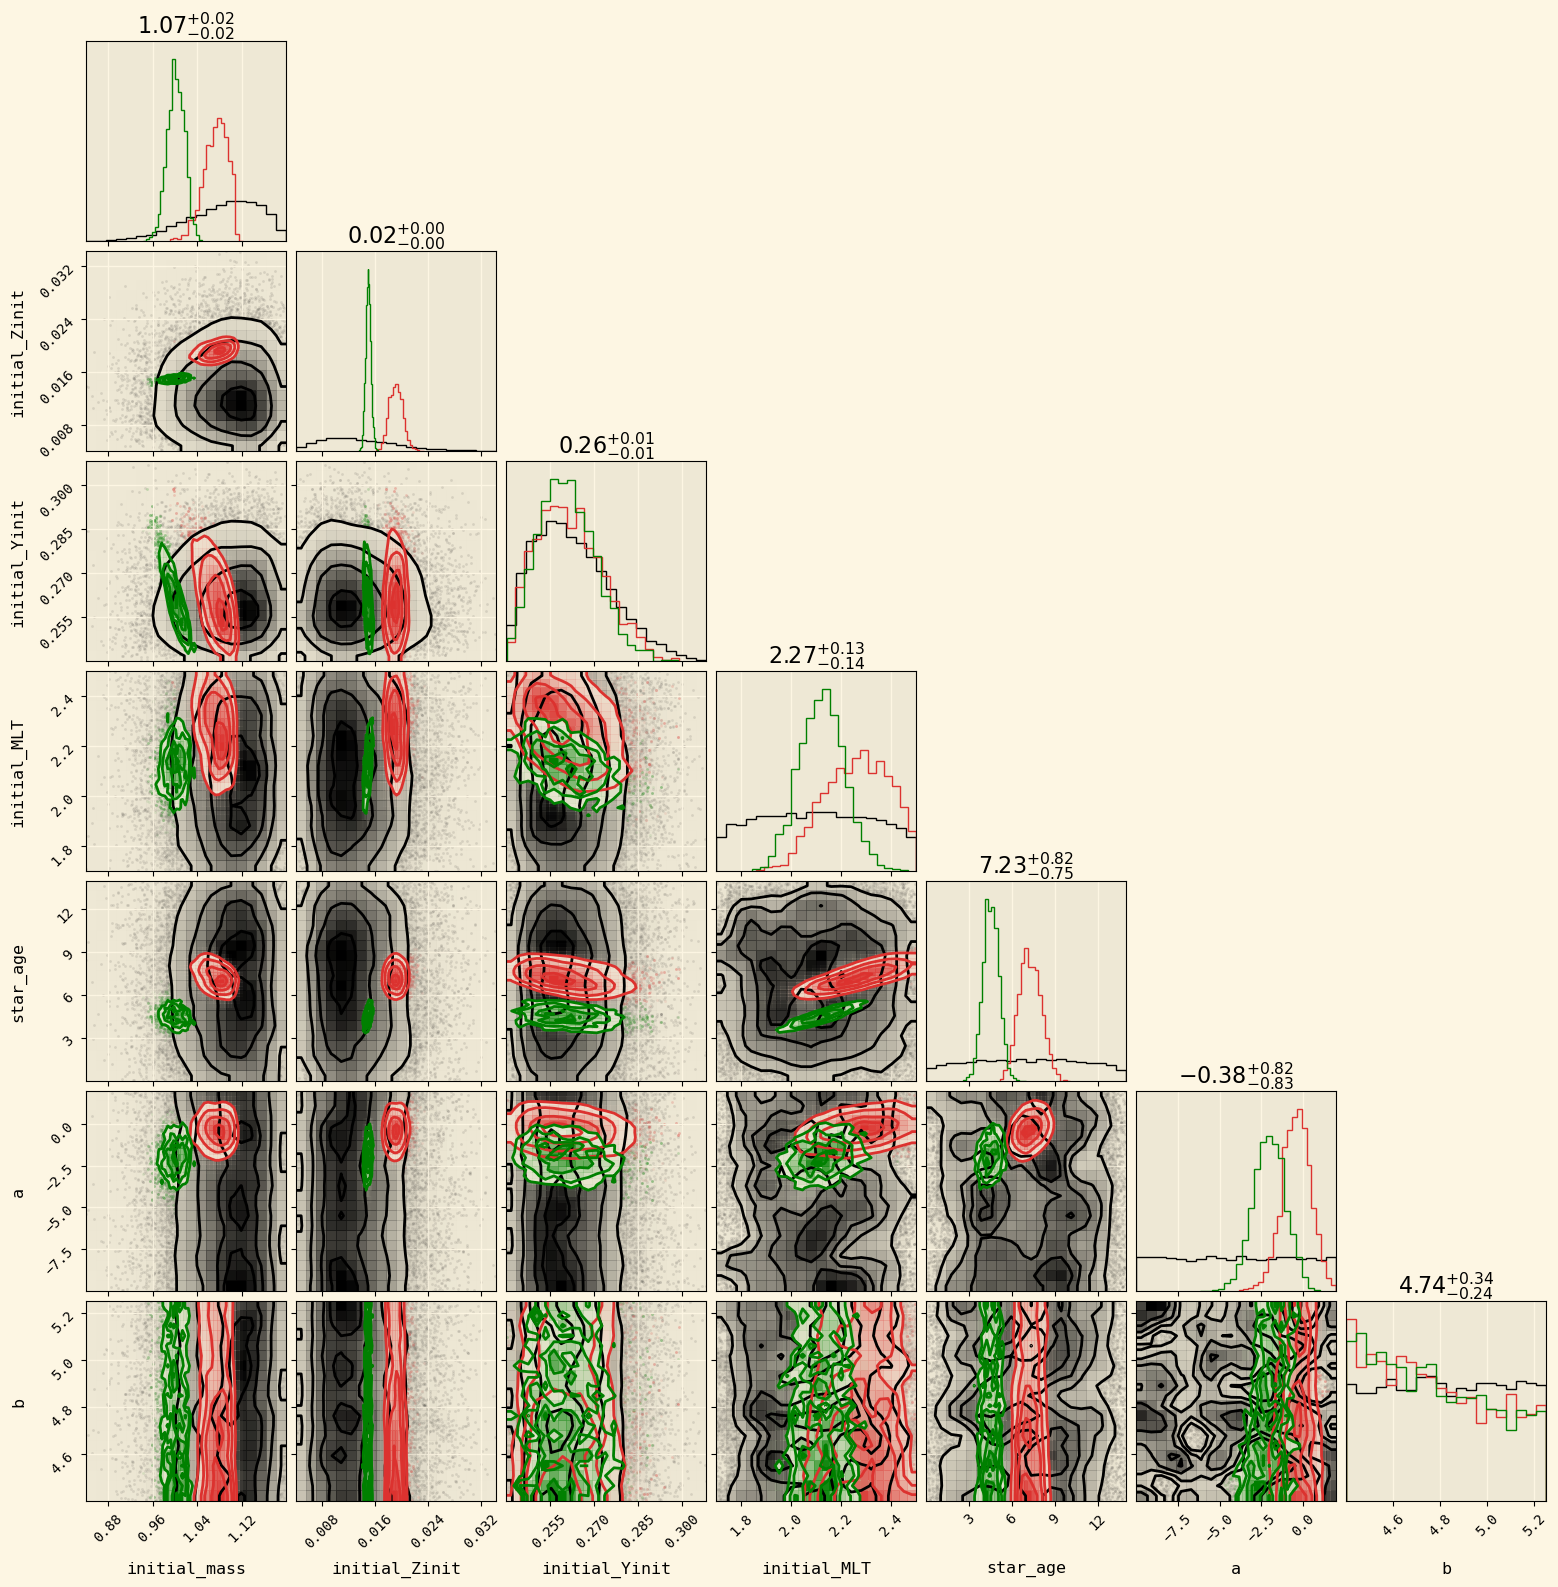

In [9]:
import pickle

Cyg_fig = inspect_star('16CygA', include_prior=True)

with open('stars/Sun/Sun_results.pkl', 'rb') as fp:
    Sun_results = pickle.load(fp)

corner.corner(Sun_results['samples'], color='g', fig=Cyg_fig, hist_kwargs={'density':True});

In [10]:
Sun_results

{'niter': 8605,
 'logz': np.float64(-18.06600984039383),
 'logzerr': np.float64(0.2880693136340006),
 'logz_bs': np.float64(-18.08429125779504),
 'logz_single': np.float64(-18.06600984039383),
 'logzerr_tail': np.float64(0.009950807107415471),
 'logzerr_bs': np.float64(0.28789739647220713),
 'ess': np.float64(2371.792488589556),
 'H': np.float64(13.355428468220786),
 'Herr': np.float64(0.1439524499208226),
 'posterior': {'mean': [1.0010533459566053,
   0.014969587844188864,
   0.26096737314751106,
   2.122361864810117,
   4.536146536507424,
   -2.0036612862004897,
   4.772664920178247],
  'stdev': [0.01531584374905901,
   0.00038426834903729245,
   0.009577038373182082,
   0.08895530863975817,
   0.5530512925599121,
   0.968761386645947,
   0.24408565637931032],
  'median': [1.0014046005742954,
   0.014963413746347052,
   0.26026548381861214,
   2.1232068557499204,
   4.533147695457341,
   -2.001462320754829,
   4.745672321438121],
  'errlo': [0.9857120828672983,
   0.01458816434657589